In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm

In [5]:
!pip install pipreqs

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13775 sha256=74eca88ed749a2de890a7c42b6730e17f9c60015eba406eedeae47e4abe2d089
  Stored in directory: c:\users\alini\appdata\local\pip\cache\wheels\7c\d7\8d\2156234738063e3d4a39ba77dc677046100e62766b53807189
Successfully built docopt


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
import torch
torch.__version__

'2.0.0'

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self, activation_fn):
        super(CNN, self).__init__()
        self.activation_fn = activation_fn

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)

        self.fc1 = nn.Linear(512, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.activation_fn(self.conv1(x))
        x = self.activation_fn(self.conv2(x))
        x = self.activation_fn(self.conv3(x))
        x = self.activation_fn(self.conv4(x))
        x = self.activation_fn(self.conv5(x))
        x = self.activation_fn(self.conv6(x))

        x = torch.mean(x, dim=(2, 3))  # Global average pooling
        x = self.activation_fn(self.fc1(x))
        x = self.fc2(x)
        return x

In [4]:
# Define the Mish activation function
class Mish(nn.Module):
    def __init__(self):
        super(Mish, self).__init__()

    def forward(self, x):
        return x * torch.tanh(nn.functional.softplus(x))

# Define the Swish activation function
class Swish(nn.Module):
    def __init__(self):
        super(Swish, self).__init__()

    def forward(self, x):
        return x * torch.sigmoid(x)

In [5]:
 # Define the training function
def train(model, criterion, optimizer, trainloader, epochs, loss_by_epochs):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in tqdm(trainloader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss / len(trainloader)}")
        loss_by_epochs.append((running_loss / len(trainloader)))
    return loss_by_epochs

In [6]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Load and preprocess CIFAR-10 dataset
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [7]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [23]:
model_mish = CNN(activation_fn=Mish()).to(device)

In [24]:
model_relu = CNN(activation_fn=nn.ReLU()).to(device)

In [25]:
model_swish = CNN(activation_fn=Swish()).to(device)

In [26]:
# Define the loss function and optimizer
num_epochs = 25
criterion = nn.CrossEntropyLoss()
optimizer_mish = optim.Adam(model_mish.parameters(), lr=0.001)
optimizer_relu = optim.Adam(model_relu.parameters(), lr=0.001)
optimizer_swish = optim.Adam(model_swish.parameters(), lr=0.001)

In [27]:
# Train the model with ReLU activation function
print("Training the model with ReLU activation function...")
loss_by_epochs_relu = train(model_relu, criterion, optimizer_relu, trainloader, epochs=num_epochs, loss_by_epochs=[])


Training the model with ReLU activation function...


100%|██████████| 391/391 [01:58<00:00,  3.30it/s]


Epoch 1/25 - Loss: 1.9286048525129742


100%|██████████| 391/391 [01:49<00:00,  3.58it/s]


Epoch 2/25 - Loss: 1.626061934339421


100%|██████████| 391/391 [01:44<00:00,  3.76it/s]


Epoch 3/25 - Loss: 1.356000209708348


100%|██████████| 391/391 [01:45<00:00,  3.69it/s]


Epoch 4/25 - Loss: 1.1600730277388298


100%|██████████| 391/391 [01:52<00:00,  3.49it/s]


Epoch 5/25 - Loss: 1.0417498318130707


100%|██████████| 391/391 [01:45<00:00,  3.72it/s]


Epoch 6/25 - Loss: 0.9599831877157207


100%|██████████| 391/391 [01:54<00:00,  3.42it/s]


Epoch 7/25 - Loss: 0.8844898966572169


100%|██████████| 391/391 [01:47<00:00,  3.65it/s]


Epoch 8/25 - Loss: 0.8202556086623151


100%|██████████| 391/391 [01:47<00:00,  3.63it/s]


Epoch 9/25 - Loss: 0.7762624595476233


100%|██████████| 391/391 [01:36<00:00,  4.06it/s]


Epoch 10/25 - Loss: 0.7250114659519147


100%|██████████| 391/391 [01:35<00:00,  4.08it/s]


Epoch 11/25 - Loss: 0.6871664459290712


100%|██████████| 391/391 [01:37<00:00,  3.99it/s]


Epoch 12/25 - Loss: 0.6469802842725574


100%|██████████| 391/391 [01:39<00:00,  3.94it/s]


Epoch 13/25 - Loss: 0.6153547247047619


100%|██████████| 391/391 [01:35<00:00,  4.09it/s]


Epoch 14/25 - Loss: 0.5829774959160544


100%|██████████| 391/391 [01:41<00:00,  3.84it/s]


Epoch 15/25 - Loss: 0.5470137508476481


100%|██████████| 391/391 [01:24<00:00,  4.65it/s]


Epoch 16/25 - Loss: 0.5249539002433152


100%|██████████| 391/391 [01:23<00:00,  4.65it/s]


Epoch 17/25 - Loss: 0.49090136438989274


100%|██████████| 391/391 [01:23<00:00,  4.66it/s]


Epoch 18/25 - Loss: 0.4705707501724858


100%|██████████| 391/391 [01:23<00:00,  4.66it/s]


Epoch 19/25 - Loss: 0.4481894556823594


100%|██████████| 391/391 [01:23<00:00,  4.67it/s]


Epoch 20/25 - Loss: 0.4316813130589092


100%|██████████| 391/391 [01:23<00:00,  4.68it/s]


Epoch 21/25 - Loss: 0.4083846666471428


100%|██████████| 391/391 [01:23<00:00,  4.67it/s]


Epoch 22/25 - Loss: 0.3868195491907237


100%|██████████| 391/391 [01:23<00:00,  4.69it/s]


Epoch 23/25 - Loss: 0.37336560519759915


100%|██████████| 391/391 [01:23<00:00,  4.67it/s]


Epoch 24/25 - Loss: 0.3568091307149824


100%|██████████| 391/391 [01:23<00:00,  4.67it/s]

Epoch 25/25 - Loss: 0.33092953409532755


In [28]:
print("Training the model with Mish activation function...")
loss_by_epochs_mish = train(model_mish, criterion, optimizer_mish, trainloader, epochs=num_epochs, loss_by_epochs=[])

Training the model with Mish activation function...


100%|██████████| 391/391 [01:41<00:00,  3.84it/s]


Epoch 1/25 - Loss: 1.9101803546671368


100%|██████████| 391/391 [01:42<00:00,  3.83it/s]


Epoch 2/25 - Loss: 1.576282256704462


100%|██████████| 391/391 [01:42<00:00,  3.82it/s]


Epoch 3/25 - Loss: 1.261125912446805


100%|██████████| 391/391 [01:51<00:00,  3.51it/s]


Epoch 4/25 - Loss: 1.024994408687972


100%|██████████| 391/391 [01:51<00:00,  3.50it/s]


Epoch 5/25 - Loss: 0.8767962852097533


100%|██████████| 391/391 [01:51<00:00,  3.49it/s]


Epoch 6/25 - Loss: 0.7659777013389656


100%|██████████| 391/391 [01:51<00:00,  3.50it/s]


Epoch 7/25 - Loss: 0.6826737678569296


100%|██████████| 391/391 [01:51<00:00,  3.51it/s]


Epoch 8/25 - Loss: 0.5999541813150391


100%|██████████| 391/391 [01:48<00:00,  3.62it/s]


Epoch 9/25 - Loss: 0.5575314801367347


100%|██████████| 391/391 [01:48<00:00,  3.61it/s]


Epoch 10/25 - Loss: 0.49218758391907147


100%|██████████| 391/391 [01:48<00:00,  3.62it/s]


Epoch 11/25 - Loss: 0.4436948473572426


100%|██████████| 391/391 [01:47<00:00,  3.62it/s]


Epoch 12/25 - Loss: 0.40334264709211676


100%|██████████| 391/391 [01:47<00:00,  3.65it/s]


Epoch 13/25 - Loss: 0.3703798738586933


100%|██████████| 391/391 [01:44<00:00,  3.75it/s]


Epoch 14/25 - Loss: 0.3274927927405023


100%|██████████| 391/391 [01:44<00:00,  3.75it/s]


Epoch 15/25 - Loss: 0.2942907814784428


100%|██████████| 391/391 [01:44<00:00,  3.76it/s]


Epoch 16/25 - Loss: 0.2623248383250383


100%|██████████| 391/391 [01:44<00:00,  3.76it/s]


Epoch 17/25 - Loss: 0.2346628146708164


100%|██████████| 391/391 [01:44<00:00,  3.76it/s]


Epoch 18/25 - Loss: 0.21790811462361184


100%|██████████| 391/391 [01:43<00:00,  3.76it/s]


Epoch 19/25 - Loss: 0.18684477370489588


100%|██████████| 391/391 [01:43<00:00,  3.76it/s]


Epoch 20/25 - Loss: 0.16879027075779712


100%|██████████| 391/391 [01:43<00:00,  3.77it/s]


Epoch 21/25 - Loss: 0.15340785202010512


100%|██████████| 391/391 [01:43<00:00,  3.77it/s]


Epoch 22/25 - Loss: 0.1471495272787026


100%|██████████| 391/391 [01:43<00:00,  3.77it/s]


Epoch 23/25 - Loss: 0.1218586289097586


100%|██████████| 391/391 [01:43<00:00,  3.77it/s]


Epoch 24/25 - Loss: 0.11955527509646037


100%|██████████| 391/391 [01:43<00:00,  3.77it/s]

Epoch 25/25 - Loss: 0.10457931386540308


In [29]:
# Train the model with Swish activation function
print("Training the model with Swish activation function...")
loss_by_epochs_swish = train(model_swish, criterion, optimizer_swish, trainloader, epochs=num_epochs, loss_by_epochs=[])


Training the model with Swish activation function...


100%|██████████| 391/391 [01:38<00:00,  3.98it/s]


Epoch 1/25 - Loss: 1.9380699505891337


100%|██████████| 391/391 [01:38<00:00,  3.98it/s]


Epoch 2/25 - Loss: 1.6381613561869277


100%|██████████| 391/391 [01:38<00:00,  3.98it/s]


Epoch 3/25 - Loss: 1.3460996155543705


100%|██████████| 391/391 [01:38<00:00,  3.98it/s]


Epoch 4/25 - Loss: 1.1076396426276478


100%|██████████| 391/391 [01:38<00:00,  3.99it/s]


Epoch 5/25 - Loss: 0.9416788827122935


100%|██████████| 391/391 [01:38<00:00,  3.99it/s]


Epoch 6/25 - Loss: 0.8200117601153186


100%|██████████| 391/391 [01:38<00:00,  3.99it/s]


Epoch 7/25 - Loss: 0.7241095180249275


100%|██████████| 391/391 [01:37<00:00,  3.99it/s]


Epoch 8/25 - Loss: 0.642926795022262


100%|██████████| 391/391 [01:40<00:00,  3.88it/s]


Epoch 9/25 - Loss: 0.5758991165234305


100%|██████████| 391/391 [01:39<00:00,  3.92it/s]


Epoch 10/25 - Loss: 0.5190298426181764


100%|██████████| 391/391 [01:39<00:00,  3.92it/s]


Epoch 11/25 - Loss: 0.4738074712588659


100%|██████████| 391/391 [01:39<00:00,  3.92it/s]


Epoch 12/25 - Loss: 0.4277559598083691


100%|██████████| 391/391 [01:39<00:00,  3.93it/s]


Epoch 13/25 - Loss: 0.38366236036543344


100%|██████████| 391/391 [01:37<00:00,  4.00it/s]


Epoch 14/25 - Loss: 0.34640041843552116


100%|██████████| 391/391 [01:37<00:00,  4.02it/s]


Epoch 15/25 - Loss: 0.315409243792829


100%|██████████| 391/391 [01:37<00:00,  4.01it/s]


Epoch 16/25 - Loss: 0.28046980008597266


100%|██████████| 391/391 [01:37<00:00,  4.02it/s]


Epoch 17/25 - Loss: 0.253371348390189


100%|██████████| 391/391 [01:37<00:00,  4.02it/s]


Epoch 18/25 - Loss: 0.22096895893364002


100%|██████████| 391/391 [01:37<00:00,  4.03it/s]


Epoch 19/25 - Loss: 0.2020922351409407


100%|██████████| 391/391 [01:37<00:00,  4.03it/s]


Epoch 20/25 - Loss: 0.18066997912800525


100%|██████████| 391/391 [01:37<00:00,  4.03it/s]


Epoch 21/25 - Loss: 0.16209455676700757


100%|██████████| 391/391 [01:36<00:00,  4.03it/s]


Epoch 22/25 - Loss: 0.1511906368081527


100%|██████████| 391/391 [01:36<00:00,  4.04it/s]


Epoch 23/25 - Loss: 0.1315740147400695


100%|██████████| 391/391 [01:37<00:00,  4.03it/s]


Epoch 24/25 - Loss: 0.12308812139989317


100%|██████████| 391/391 [01:36<00:00,  4.03it/s]

Epoch 25/25 - Loss: 0.11078696635544605


[]

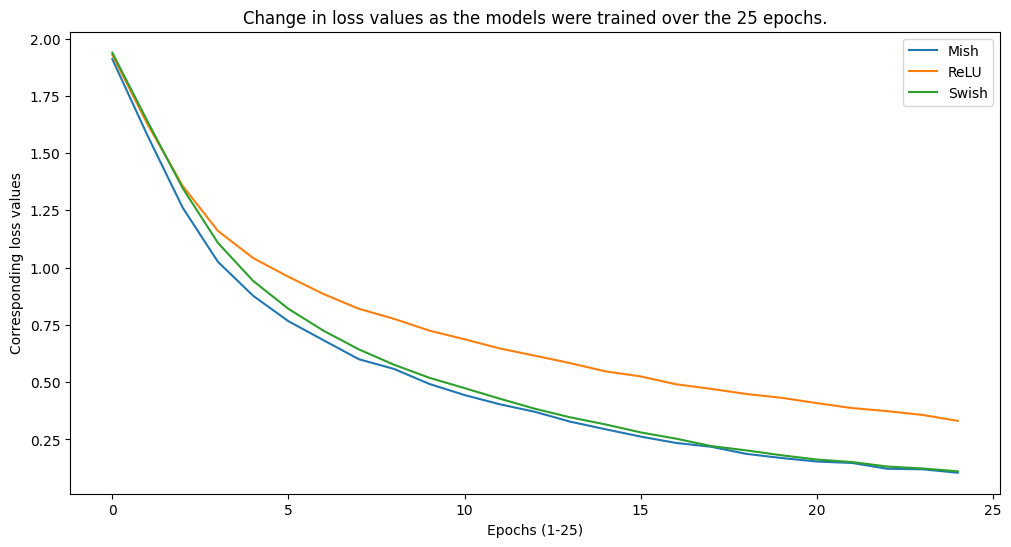

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
xs = range(num_epochs)

plt.plot(xs, loss_by_epochs_mish, label='Mish')
plt.plot(xs, loss_by_epochs_relu, label='ReLU')
plt.plot(xs, loss_by_epochs_swish, label='Swish')
plt.title("Change in loss values as the models were trained over the 25 epochs.")
plt.xlabel("Epochs (1-25)")
plt.ylabel("Corresponding loss values")
plt.legend()

plt.plot()




In [31]:
# Evaluate the models on the test set
def evaluate(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [32]:
accuracy_mish = evaluate(model_mish, testloader)
accuracy_relu = evaluate(model_relu, testloader)
accuracy_swish = evaluate(model_swish, testloader)

print(f"Accuracy of the model with Mish activation function: {accuracy_mish}%")
print(f"Accuracy of the model with ReLU activation function: {accuracy_relu}%")
print(f"Accuracy of the model with Swish activation function: {accuracy_swish}%")

Accuracy of the model with Mish activation function: 83.2%
Accuracy of the model with ReLU activation function: 80.7%
Accuracy of the model with Swish activation function: 84.61%


In [33]:
torch.save(model_relu, "modelrelu_cifar.pth")
torch.save(model_relu.state_dict(), "modelrelu_cifar_statedict.pth")

In [34]:
torch.save(model_mish, "model_mish_cifar.pth")
torch.save(model_mish.state_dict(), "model_mish_cifar_statedict.pth")

In [35]:
torch.save(model_swish, "model_swish_cifar.pth")
torch.save(model_swish.state_dict(), "model_swish_cifar_statedict.pth")